In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath

In [2]:
sympy.init_printing()

In [4]:
a, b, X = sympy.symbols('a, b, x')
f = sympy.Function('f')

In [5]:
x = a, (a+b)/2, b
w = [sympy.symbols('w_%d' % i) for i in range(len(x))]

In [6]:
x

In [7]:
w

In [8]:
q_rule = sum(w[i]*f(x[i]) for i in range(len(x)))
q_rule

In [10]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]
phi

In [11]:
eqs = [q_rule.subs(f, phi[n])-sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

In [12]:
eqs

In [13]:
w_sol = sympy.solve(eqs, w)
w_sol

In [14]:
q_rule.subs(w_sol).simplify()

In [15]:
def f(x):
    return np.exp(-x**2)
val, err = integrate.quad(f, -1, 1)
val, err

In [16]:
def f(x, a, b, c):
    return a * np.exp(-((x - b)/c)**2)

In [17]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

In [18]:
val

In [19]:
err

In [20]:
from scipy.special import jv
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)
val, err

In [21]:
val, err = integrate.quad(lambda x: np.exp(-x**2), -np.inf, np.inf)
val, err

In [22]:
f = lambda x: 1/np.sqrt(abs(x))

In [23]:
val, err = integrate.quad(f, -1, 1)
val, err

<ipython-input-22-cb08fa3913fe>:1: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/np.sqrt(abs(x))


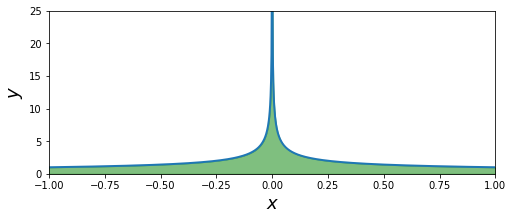

In [25]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-1, 1, 1000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1)

In [26]:
val, err = integrate.quad(f, -1, 1, points=[0])
val, err

In [27]:
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)
y = f(x)

Text(0, 0.5, '$y$')

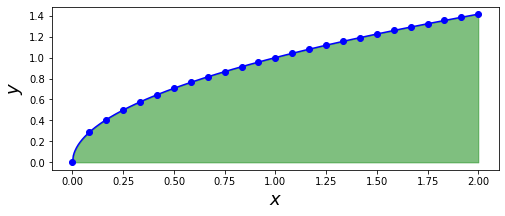

In [28]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

In [29]:
val_trapz = integrate.trapz(y, x)
val_trapz

In [30]:
val_simps = integrate.simps(y, x)
val_simps

In [31]:
x = np.linspace(a, b, 1+2**6)

In [32]:
len(x)

In [33]:
y = f(x)

In [34]:
dx = x[1]-x[0]

In [35]:
integrate.romb(y, dx=dx)

In [36]:
def f(x, y):
    return np.exp(-x**2-y**2)

Text(0, 0.5, '$y$')

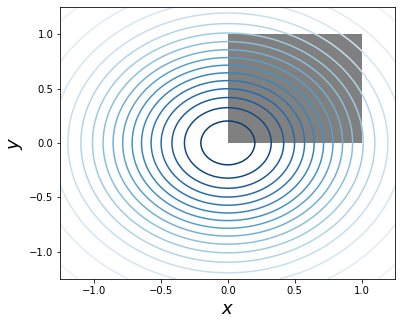

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)
c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor='grey')
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

In [38]:
a, b = 0, 1
g = lambda x: 0
h = lambda x: 1

In [39]:
integrate.dblquad(f, a, b, g, h)

In [40]:
integrate.dblquad(f, a, b, lambda x: -1+x, lambda x: 1-x)

In [41]:
def f(*args):
    return np.exp(-np.sum(np.array(args)**2))

In [42]:
%time integrate.nquad(f, [(0, 1)]*1)

CPU times: user 714 µs, sys: 0 ns, total: 714 µs
Wall time: 723 µs


In [43]:
%time integrate.nquad(f, [(0, 1)]*2)

CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 9.9 ms


In [44]:
%time integrate.nquad(f, [(0, 1)]*3)

CPU times: user 70.1 ms, sys: 0 ns, total: 70.1 ms
Wall time: 69.1 ms


In [45]:
%time integrate.nquad(f, [(0, 1)]*4)

CPU times: user 1.37 s, sys: 0 ns, total: 1.37 s
Wall time: 1.37 s


In [46]:
%time integrate.nquad(f, [(0, 1)]*5)

CPU times: user 29.5 s, sys: 0 ns, total: 29.5 s
Wall time: 29.5 s


In [47]:
import skmonaco

ModuleNotFoundError: No module named 'skmonaco'

In [48]:
x = sympy.symbols('x')
f = 2*sympy.sqrt(1-x**2)
a, b = -1, 1

In [49]:
val_sym = sympy.integrate(f, (x, a, b))
val_sym

In [50]:
mpmath.mp.dps = 75

In [51]:
f_mpmath = sympy.lambdify(x, f, 'mpmath')

In [52]:
f_mpmath

<function _lambdifygenerated(x)>

In [53]:
val = mpmath.quad(f_mpmath, (a, b))
val

mpf('3.14159265358979323846264338327950288419716939937510582097494459230781640628613')

In [54]:
sympy.N(val_sym, mpmath.mp.dps+1)-val